In [1]:
print("test")

test


In [2]:
home_path = '/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/'

# Analysis

In [3]:
import pandas as pd
# from LabData.DataLoaders.GutMBLoader import GutMBLoader
# from LabData.DataLoaders.SubjectLoader import SubjectLoader
# from LabData.DataLoaders.DietLoggingLoader import DietLoggingLoader
# from LabData.DataAnalyses.TenK_Trajectories.utils import get_diet_logging_around_stage
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from statistics import mean
from scipy import stats
import matplotlib.pyplot as plt
import pickle
import lightgbm as lgb
import math
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests

In [4]:
def read_results(df):
    output = []
    for col in df.columns:
        output.append(df[col])
    return tuple(output)

In [5]:
diet_mb = pd.read_pickle(home_path + "data/diet_mb.pkl")
with open(home_path + 'data/my_lists.pkl', 'rb') as file:
    loaded_lists = pickle.load(file)
base_features, all_features, targets = loaded_lists
diet_mb

,Acorn squash,Alfalfa sprouts,Almond Beverage,Almond flour,Almond spread,Almonds,Amba,Anchovy,Aperol,Apple,...,fBin__88|gBin__434|sBin__637,fBin__94|gBin__448|sBin__654,fBin__94|gBin__449|sBin__656,fBin__95|gBin__450|sBin__659,fBin__96|gBin__457|sBin__669,fBin__97|gBin__462|sBin__676,fBin__97|gBin__462|sBin__678,fBin__99|gBin__469|sBin__687,Richness,Shannon_diversity
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
10K_1000942861,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.016416,...,-4.000000,-4.000000,-4.0,-4.0,-4.0,-4.000000,-4.000000,-4.000000,189,3.71
10K_1001201093,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.013895,...,-4.000000,-4.000000,-4.0,-4.0,-4.0,-4.000000,-4.000000,-4.000000,150,3.30
10K_1002254441,0.0,0.000000,0.0,0.0,0.0,0.080736,0.0,0.0,0.000000,0.000000,...,-4.000000,-3.368405,-4.0,-4.0,-4.0,-4.000000,-2.523371,-4.000000,250,3.32
10K_1003113258,0.0,0.000000,0.0,0.0,0.0,0.002037,0.0,0.0,0.000000,0.008880,...,-4.000000,-3.677630,-4.0,-4.0,-4.0,-4.000000,-3.861761,-4.000000,262,3.90
10K_1007330152,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,-2.494574,-4.000000,-4.0,-4.0,-4.0,-4.000000,-1.941250,-2.985687,194,3.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10K_9995823183,0.0,0.000054,0.0,0.0,0.0,0.051311,0.0,0.0,0.000000,0.000000,...,-3.610761,-3.347382,-4.0,-4.0,-4.0,-2.503550,-2.421434,-4.000000,206,3.57
10K_9996884777,0.0,0.000000,0.0,0.0,0.0,0.002401,0.0,0.0,0.000000,0.000000,...,-3.213395,-3.367979,-4.0,-4.0,-4.0,-4.000000,-3.850233,-3.804074,257,3.89
10K_9998420917,0.0,0.000000,0.0,0.0,0.0,0.019408,0.0,0.0,0.000000,0.018232,...,-2.803094,-3.327214,-4.0,-4.0,-4.0,-2.582016,-2.457185,-4.000000,264,4.13


In [6]:
# diet_mb['Carbohydrate, by difference']

## Diversity Targets

### Age and Gender

In [7]:
# def train_test(df, features, target_list, model):
#     all_scores = []
#     all_p_values=[]
#     all_coefs = []
#     all_feat_names = []
#     for target in target_list:
#         kf = KFold(n_splits=5, shuffle=False, random_state=1)
#         preds = []
#         targets = []
#         for train_index, test_index in kf.split(df):
#             train = df.iloc[train_index]
#             test = df.iloc[test_index]

#             if model == "ridge":
#                 model = linear_model.RidgeCV(alphas=(0.01, 0.1, 0.5, 1, 10, 100))
#             elif model == "lgbm":
#                 model = lgb.LGBMRegressor(max_depth=4, n_estimators=2000, subsample=0.5, subsample_freq=1, colsample_bytree=1, learning_rate=0.001, n_jobs=8, random_state=1)
#             model.fit(train[features], train[target])
#             predictions = model.predict(test[features])
#             # score = r2_score(test[target], predictions)
#             preds.extend(predictions)
#             targets.extend(test[target])
#             # print(model.alpha_)

#         score = stats.pearsonr(preds, targets)
#         all_scores.append(score[0])
#         all_p_values.append(score[1])
#         if model == "linear":
#             all_coefs.append(model.coef_)
#             all_feat_names.append(model.feature_names_in_)
#         elif model == "lgbm":
#             all_coefs.append(model.feature_importances_)
#             all_feat_names.append(model.feature_name_)
#     return all_scores, all_p_values, all_coefs, all_feat_names

In [8]:
diversity_targets = ['Richness', 'Shannon_diversity']
# ridge_base_scores_div, ridge_base_pvalues_div, ridge_base_coefs_div, ridge_base_fnames_div = train_test(diet_mb, base_features, diversity_targets, "ridge")
ridge_base_scores_div, ridge_base_pvalues_div, ridge_base_coefs_div, ridge_base_preds_div, ridge_base_targets_div, prevalence = read_results(pd.read_pickle(home_path + "/data/given_presence/output_base_ridge_div.pkl"))
ridge_base_scores_div

0    0.012068
1    0.131991
Name: 0, dtype: float64

In [9]:
# lgbm_base_scores_div, lgbm_base_pvalues_div, lgbm_base_coefs_div, lgbm_base_fnames_div = train_test(diet_mb, base_features, diversity_targets, "lgbm")
lgbm_base_scores_div, lgbm_base_pvalues_div, lgbm_base_coefs_div, lgbm_base_preds_div, lgbm_base_targets_div, prevalence = read_results(pd.read_pickle(home_path + "data/given_presence/output_base_LGBM_div.pkl"))
lgbm_base_scores_div

0    0.037723
1    0.125932
Name: 0, dtype: float64

In [10]:
# # Save base models results

# ridge_base_res_div = pd.concat([pd.Series(ridge_base_scores_div), pd.Series(ridge_base_pvalues_div), pd.Series(ridge_base_coefs_div), pd.Series(ridge_base_fnames_div)], axis=1)
# ridge_base_res_div.to_pickle(home_path + "/data/given_presence/ridge_base_div.pkl")

# lgbm_base_res_div = pd.concat([pd.Series(lgbm_base_scores_div), pd.Series(lgbm_base_pvalues_div), pd.Series(lgbm_base_coefs_div), pd.Series(lgbm_base_fnames_div)], axis=1)
# lgbm_base_res_div.to_pickle(home_path + "data/given_presence/lgbm_base_div.pkl")

### Diet

In [11]:
lgbm_div_scores, lgbm_div_pvalues, lgbm_div_coefs, lgbm_div_preds, lgbm_div_targets, prevalence = read_results(pd.read_pickle(home_path + "data/given_presence/output_LGBM_div.pkl"))
print(lgbm_div_scores)
print(lgbm_div_pvalues)
print(lgbm_div_coefs)

0    0.228925
1    0.211305
Name: 0, dtype: float64
0    9.116605e-93
1    5.265744e-79
Name: 1, dtype: float64
0    [4, 0, 13, 0, 2, 49, 6, 0, 1, 123, 7, 0, 0, 0,...
1    [1, 0, 8, 0, 0, 41, 13, 0, 1, 83, 13, 0, 3, 0,...
Name: 2, dtype: object


In [12]:
# def remove_problematic_features(coefs, fnames):
#     features_to_drop = ['Beans_black_eyed_peas', 'Mille_feuille', 'cereal_type__Cornflakes_with_sugar__cookies__pillows__etc__', 'never_eat__Sugar_or_foods___beverages_that_contain_sugar']
#     indexes = []
#     for item in features_to_drop:
#         index = fnames.index(item)
#         indexes.append(index)
#     return indexes

# remove_problematic_features(lgbm_div_coefs, lgbm_div_fnames[0])

In [13]:
coefs_richness = pd.Series(lgbm_div_coefs[0])
fnames_richness = pd.Series(all_features)
print(coefs_richness.sort_values())
print(fnames_richness.iloc[coefs_richness.sort_values()[-5:].index])

382      0
531      0
434      0
151      0
314      0
      ... 
759    317
622    329
643    347
722    352
188    469
Length: 787, dtype: int32
759                  Fruits
622                    Wine
643            Potassium, K
722    pct_alcohol_calories
188                   Dates
dtype: object


In [14]:
ridge_div_scores, ridge_div_pvalues, ridge_div_coefs, ridge_div_preds, ridge_div_targets, prevalence = read_results(pd.read_pickle(home_path + "data/given_presence/output_ridge_div.pkl"))
ridge_div_scores

0    0.157147
1    0.138726
Name: 0, dtype: float64

[221.94799252017785, 216.4646036458438, 198.33229964489217, 197.54287507829125, 209.2996558570465, 209.5555182991432, 217.66324591598922, 220.46314663096067, 238.42544370933524, 221.59648970877598, 216.79684720798306, 223.24190750267772, 198.25336514411634, 194.8770906449987, 190.16555126351372, 211.75348797740827, 203.1623775259406, 201.20188271939577, 155.3627309913122, 190.26452304093067, 224.71358107848627, 230.20905129754433, 191.86264226160029, 220.5539085000445, 241.89606749214846, 201.8900771724359, 235.72096103497162, 230.66650568192767, 175.48489571173866, 241.7606721458806, 217.47491524120545, 231.34994707104923, 207.32737330176033, 133.997112918139, 251.9620545117438, 229.31365166530043, 209.35953582086128, 212.94395903819128, 209.5251252587178, 224.18070249774368, 195.8928754565561, 178.7696413927273, 236.84585477124, 207.84255749123358, 197.56838217250555, 214.72561843263057, 124.74145609668498, 192.7498132680359, 185.2981374544428, 227.43817469696006, 208.4458066328736, 

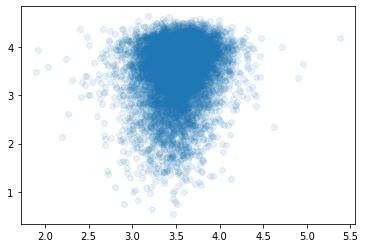

In [15]:
plt.scatter(ridge_div_preds[1], ridge_div_targets[1], alpha=0.1)
print(ridge_div_preds[0])
print(ridge_div_targets[0])
plt.show()

[216.1202324459531, 216.7588861015778, 217.20986495488393, 200.50159161742312, 213.559324539622, 217.29745253213693, 195.3038853296784, 216.6167424473133, 220.59950966876886, 222.31038595894563, 209.90844341143548, 224.13739864880802, 213.29416975199035, 209.18231751623838, 209.2053812741106, 210.60689057171933, 214.778403409097, 213.6057375164051, 203.73623272926028, 217.0914667730032, 214.95756598793648, 216.8606667347717, 212.99397365249848, 218.20269487744213, 223.0945452987337, 199.17763762722555, 223.30059184304972, 229.46981947470965, 199.67677131613576, 221.18336764675385, 214.46581981557725, 223.31014100245997, 218.2948578655144, 209.4307575743733, 228.1109699075933, 220.4351254968449, 207.89173490210817, 216.6669730621869, 215.5721255549077, 214.8756029245101, 198.4853455210913, 209.7221721293642, 219.90668445329564, 213.10049243758738, 211.08769512897982, 224.669539834281, 212.6275315824564, 211.18084878608857, 219.1935954974546, 217.00463976856997, 214.84646373706536, 214.3

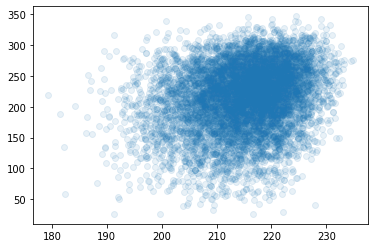

In [16]:
plt.scatter(lgbm_div_preds[0], lgbm_div_targets[0], alpha=0.1)
print(lgbm_div_preds[0])
print(lgbm_div_targets[0])
plt.show()

#### What is a good correlation?
Comparing to permutated data.

In [17]:
# lgbm_div_perm_scores, lgbm_div_perm_pvalues = read_results(pd.read_pickle(home_path + "data/given_presence/lightGBM_output_diversity_perm.pkl"))
div_perm_scores = pd.read_pickle(home_path + "data/given_presence/output_LGBM_div_perm.pkl")
# div_perm_scores = div_perm.loc[:, 0]
# div_perm_pvalues = div_perm.loc[:, 1]

FileNotFoundError: [Errno 2] No such file or directory: '/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/given_presence/output_LGBM_div_perm.pkl'

Max corr permutation: 0.0337792937359015


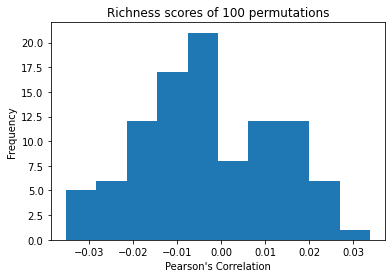

In [ ]:
richness_perm_scores = pd.Series(div_perm_scores.iloc[0])
richness_perm_scores.plot.hist()
# plt.axvline(richness_perm_scores.mean(), color="red")
# plt.axvline(richness_perm_scores.median(), color="black")
plt.title("Richness scores of 100 permutations")
plt.xlabel("Pearson's Correlation")
print("Max corr permutation:", max(richness_perm_scores))

Max corr permutation: 0.04306872675115345


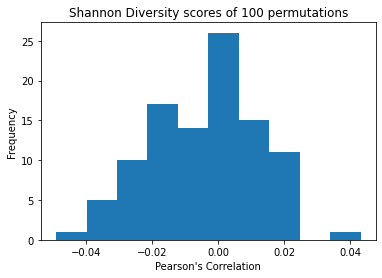

In [ ]:
shannon_perm_scores = pd.Series(div_perm_scores.iloc[1])
shannon_perm_scores.plot.hist()
# plt.axvline(shannon_perm_scores.mean(), color="red")
# plt.axvline(shannon_perm_scores.median(), color="black")
plt.title("Shannon Diversity scores of 100 permutations")
plt.xlabel("Pearson's Correlation")
print("Max corr permutation:", max(shannon_perm_scores))

In [ ]:
def calc_p_value(perm_scores, true_score):
    bigger_than_true = (perm_scores >= true_score).sum()
    print(bigger_than_true)
    return float(bigger_than_true) / len(perm_scores)
    

richness_true_score = lgbm_div_scores[0]
shannon_true_score = lgbm_div_scores[1]
richness_pval = calc_p_value(richness_perm_scores, richness_true_score)
shannon_pval = calc_p_value(shannon_perm_scores, shannon_true_score)

# If pval is 0, it means it's smaller than 0.01 since I did 100 permutations.

0
0


In [ ]:
def calc_confidence_interval(scores):
    return scores.quantile(0.025), scores.quantile(0.975)

richness_ci = calc_confidence_interval(richness_perm_scores)
shannon_ci = calc_confidence_interval(shannon_perm_scores)

print("Richness confidence interval:", richness_ci)
print("Shannon diversity confidence interval:", shannon_ci)

Richness confidence interval: (-0.02887227086498546, 0.02500966298176895)
Shannon diversity confidence interval: (-0.03419249916222901, 0.02333211854673544)


                  Ridge  LightGBM
Richness       0.146375  0.231267
Shannon Index  0.115096  0.220374


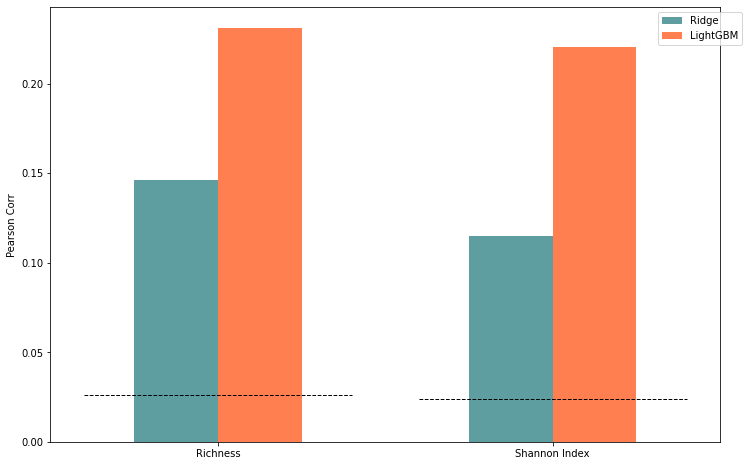

<Figure size 432x288 with 0 Axes>

In [ ]:
# Assuming to_plot is already prepared
to_plot = pd.concat([ridge_div_scores, lgbm_div_scores], axis=1)
to_plot.columns = ["Ridge", "LightGBM"]
to_plot.index = ["Richness", "Shannon Index"]
print(to_plot)

# Plot the bar chart
ax = to_plot.plot(kind="bar", legend=True, figsize=(12, 8), color=['cadetblue', 'coral'])
# plt.title("Pearson corr of diversity metrics")
plt.ylabel("Pearson Corr")
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(0.9, 1.0), loc='upper left')

# Calculate bar positions
bar_positions = range(len(to_plot))  # x-positions for the bars (0 for Richness, 1 for Shannon)

# Add separate horizontal lines for each index
percentile_99_richness = np.percentile(richness_perm_scores.values.flatten(), 99)
percentile_99_shannon = np.percentile(shannon_perm_scores.values.flatten(), 99)

# Horizontal line for Richness
ax.plot(
    [bar_positions[0] - 0.4, bar_positions[0] + 0.4],  # x-range covering the Richness bar
    [percentile_99_richness, percentile_99_richness],  # y-values for the horizontal line
    color='black', linestyle='--', linewidth=1, label="99th percentile (Richness)"
)

# Horizontal line for Shannon Index
ax.plot(
    [bar_positions[1] - 0.4, bar_positions[1] + 0.4],  # x-range covering the Shannon Index bar
    [percentile_99_shannon, percentile_99_shannon],  # y-values for the horizontal line
    color='black', linestyle='--', linewidth=1, label="99th percentile (Shannon)"
)

# # Annotate the lines
# plt.text(bar_positions[0], percentile_99_richness + 0.01, f"{percentile_99_richness:.2f}", color='black', fontsize=10, ha='center')
# plt.text(bar_positions[1], percentile_99_shannon + 0.01, f"{percentile_99_shannon:.2f}", color='black', fontsize=10, ha='center')

# Save and show the plot
plt.savefig(home_path + "figures/diversity_corr_ridge_lgbm_with_percentiles_separate.pdf", dpi=300, facecolor="white", transparent=False, bbox_inches='tight')
plt.show()
plt.clf()


## Microbes Targets

### Age and Gender

In [17]:
# lgbm_base_scores, lgbm_base_pvalues, lgbm_base_coefs, lgbm_base_fnames = train_test(diet_mb, base_features, targets, "lgbm")
lgbm_base_scores, lgbm_base_pvalues, lgbm_base_coefs, lgbm_base_preds, lgbm_base_targets, prevalence = read_results(pd.read_pickle(home_path + "data/given_presence/output_base_LGBM_abundance.pkl"))
lgbm_base_scores

0     -0.050290
1     -0.143313
2      0.015094
3      0.041754
4     -0.073798
         ...   
720   -0.023821
721    0.027432
722   -0.058059
723    0.051776
724    0.033364
Name: 0, Length: 725, dtype: float64

In [18]:
# ridge_base_scores, ridge_base_pvalues, ridge_base_coefs, ridge_base_fnames = train_test(diet_mb, base_features, targets, "ridge")
ridge_base_scores, ridge_base_pvalues, ridge_base_coefs, ridge_base_preds, ridge_base_targets, prevalence = read_results(pd.read_pickle(home_path + "data/given_presence/output_base_ridge_abundance.pkl"))
ridge_base_scores

0      0.047214
1     -0.032216
2      0.009092
3      0.019637
4     -0.081250
         ...   
720    0.080922
721   -0.072292
722   -0.098722
723    0.060129
724    0.015661
Name: 0, Length: 725, dtype: float64

In [19]:
# # Save base models results

# ridge_base_res = pd.concat([pd.Series(ridge_base_scores), pd.Series(ridge_base_pvalues), pd.Series(ridge_base_coefs), pd.Series(ridge_base_fnames)], axis=1)
# ridge_base_res.to_pickle(home_path + "data/given_presence/ridge_base_abundance.pkl")

# lgbm_base_res = pd.concat([pd.Series(lgbm_base_scores), pd.Series(lgbm_base_pvalues), pd.Series(lgbm_base_coefs), pd.Series(lgbm_base_fnames)], axis=1)
# lgbm_base_res.to_pickle(home_path + "data/given_presence/lgbm_base_abundance.pkl")

### Diet

In [20]:
lgbm_diet_scores, lgbm_diet_pvalues, lgbm_diet_coefs, lgbm_diet_preds, lgbm_diet_targets, prevalence = read_results(pd.read_pickle(home_path + "data/given_presence/output_LGBM_abundance.pkl"))
print(lgbm_diet_scores)

0      0.048817
1      0.122421
2     -0.030850
3      0.053797
4     -0.063069
         ...   
720    0.145269
721    0.203423
722    0.108041
723    0.049197
724    0.061833
Name: 0, Length: 725, dtype: float64


<AxesSubplot:>

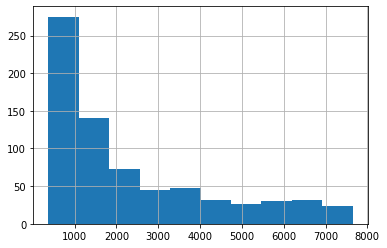

In [21]:
prevalence.hist()

In [22]:
lgbm_diet_scores = pd.Series(lgbm_diet_scores)
lgbm_diet_scores.describe()

count    725.000000
mean       0.089363
std        0.081109
min       -0.184753
25%        0.035552
50%        0.085516
75%        0.143804
max        0.346376
Name: 0, dtype: float64

### Choose Significant Targets without permutations

In [23]:
# How many predictions were statistically significant?
signifancts = lgbm_diet_pvalues[lgbm_diet_pvalues < 0.05].shape[0]
print("{} significant predictions ({}%)".format(signifancts, round((signifancts/len(lgbm_diet_pvalues))*100), 2))

485 significant predictions (67%)


In [24]:
lgbm_diet_pvalues_adj = multipletests(lgbm_diet_pvalues, method='fdr_bh', alpha=0.05)[1]
lgbm_diet_pvalues_adj = pd.Series(lgbm_diet_pvalues_adj)
pd.Series(lgbm_diet_pvalues_adj).sort_values()


223    1.841468e-155
595    6.648819e-150
280    1.448250e-115
284    1.931826e-103
580    1.535786e-100
           ...      
364     9.954442e-01
322     9.967814e-01
445     9.973213e-01
21      9.978707e-01
170     9.978707e-01
Length: 725, dtype: float64

In [25]:
# How many predictions were statistically significant after adjustment?
significants_adj = lgbm_diet_pvalues_adj[lgbm_diet_pvalues_adj < 0.05].shape[0]
print("{} significant predictions ({}%) after adjustment.".format(significants_adj, round((signifancts/len(lgbm_diet_pvalues))*100), 2))

464 significant predictions (67%) after adjustment.


In [26]:
significant_targets = [target for target, p_adj in zip(targets, lgbm_diet_pvalues_adj) if p_adj < 0.05]
print(targets)
print(len(targets))
print(significant_targets)
print(len(significant_targets))


['fBin__100|gBin__473|sBin__693', 'fBin__100|gBin__473|sBin__694', 'fBin__100|gBin__474|sBin__695', 'fBin__100|gBin__477|sBin__698', 'fBin__100|gBin__481|sBin__704', 'fBin__100|gBin__481|sBin__705', 'fBin__100|gBin__481|sBin__706', 'fBin__100|gBin__483|sBin__709', 'fBin__102|gBin__490|sBin__720', 'fBin__102|gBin__490|sBin__721', 'fBin__102|gBin__490|sBin__722', 'fBin__103|gBin__491|sBin__727', 'fBin__104|gBin__493|sBin__730', 'fBin__104|gBin__494|sBin__731', 'fBin__104|gBin__495|sBin__732', 'fBin__104|gBin__496|sBin__733', 'fBin__104|gBin__496|sBin__734', 'fBin__104|gBin__498|sBin__736', 'fBin__104|gBin__500|sBin__738', 'fBin__108|gBin__515|sBin__766', 'fBin__108|gBin__515|sBin__767', 'fBin__108|gBin__517|sBin__769', 'fBin__108|gBin__521|sBin__773', 'fBin__108|gBin__523|sBin__776', 'fBin__108|gBin__525|sBin__778', 'fBin__108|gBin__526|sBin__779', 'fBin__108|gBin__531|sBin__787', 'fBin__121|gBin__564|sBin__834', 'fBin__121|gBin__566|sBin__836', 'fBin__121|gBin__568|sBin__838', 'fBin__12

In [27]:
significant_targets_index = [index for index, (target, p_adj) in enumerate(zip(targets, lgbm_diet_pvalues_adj)) if p_adj < 0.05]
print(targets)
print(significant_targets_index)


['fBin__100|gBin__473|sBin__693', 'fBin__100|gBin__473|sBin__694', 'fBin__100|gBin__474|sBin__695', 'fBin__100|gBin__477|sBin__698', 'fBin__100|gBin__481|sBin__704', 'fBin__100|gBin__481|sBin__705', 'fBin__100|gBin__481|sBin__706', 'fBin__100|gBin__483|sBin__709', 'fBin__102|gBin__490|sBin__720', 'fBin__102|gBin__490|sBin__721', 'fBin__102|gBin__490|sBin__722', 'fBin__103|gBin__491|sBin__727', 'fBin__104|gBin__493|sBin__730', 'fBin__104|gBin__494|sBin__731', 'fBin__104|gBin__495|sBin__732', 'fBin__104|gBin__496|sBin__733', 'fBin__104|gBin__496|sBin__734', 'fBin__104|gBin__498|sBin__736', 'fBin__104|gBin__500|sBin__738', 'fBin__108|gBin__515|sBin__766', 'fBin__108|gBin__515|sBin__767', 'fBin__108|gBin__517|sBin__769', 'fBin__108|gBin__521|sBin__773', 'fBin__108|gBin__523|sBin__776', 'fBin__108|gBin__525|sBin__778', 'fBin__108|gBin__526|sBin__779', 'fBin__108|gBin__531|sBin__787', 'fBin__121|gBin__564|sBin__834', 'fBin__121|gBin__566|sBin__836', 'fBin__121|gBin__568|sBin__838', 'fBin__12

In [28]:
with open(home_path + 'data/given_presence/significant_targets.pkl', 'wb') as file:
    pickle.dump(significant_targets, file)

In [29]:
matched_data = pd.DataFrame({'scores': lgbm_diet_scores, 'pvalues_adj': lgbm_diet_pvalues_adj}).dropna()
non_significant_scores = matched_data.loc[matched_data['pvalues_adj'] >= 0.05, 'scores']
percentile_99 = np.percentile(non_significant_scores, 99)
print("99th percentile of non-significant scores:", percentile_99)

99th percentile of non-significant scores: 0.08165896362877503


### Continue

In [30]:
ridge_diet_scores, ridge_diet_pvalues, ridge_diet_coefs, ridge_diet_preds, ridge_diet_targets, prevalence = read_results(pd.read_pickle(home_path + "data/given_presence/output_ridge_abundance.pkl"))
print(ridge_diet_scores)

0      0.056708
1      0.024049
2     -0.013525
3      0.034563
4     -0.036429
         ...   
720    0.105857
721    0.136218
722    0.142048
723    0.033173
724   -0.022178
Name: 0, Length: 725, dtype: float64


In [31]:
ridge_diet_scores = pd.Series(ridge_diet_scores)
ridge_diet_scores.describe()

count    725.000000
mean       0.044252
std        0.053446
min       -0.118371
25%        0.008862
50%        0.045132
75%        0.075674
max        0.257310
Name: 0, dtype: float64

In [32]:
# How many predictions were statistically significant?
signifancts = ridge_diet_pvalues[ridge_diet_pvalues < 0.05].shape[0]
print("{} significant predictions ({}%)".format(signifancts, round((signifancts/len(lgbm_diet_pvalues))*100), 2))

351 significant predictions (48%)


In [33]:
# Improvement from linear to LGBM
delta = pd.Series(lgbm_diet_scores) - pd.Series(ridge_diet_scores)
delta.describe()

count    725.000000
mean       0.045111
std        0.062738
min       -0.278694
25%        0.009781
50%        0.054064
75%        0.086290
max        0.190872
Name: 0, dtype: float64

In [34]:
print("Improvement median:", delta.median())

Improvement median: 0.054064486226838696


In [35]:
print("Number of microbes with better LGBM prediction: ", delta[delta > 0].shape[0])
print("Number of microbes with better Linear prediction: ", delta[delta < 0].shape[0])

Number of microbes with better LGBM prediction:  567
Number of microbes with better Linear prediction:  158


## Permutations
In order to find out the size of a significant correlation.

In [ ]:
# lgbm_div_perm_scores, lgbm_div_perm_pvalues = read_results(pd.read_pickle(home_path + "data/given_presence/lightGBM_output_diversity_perm.pkl"))
lgbm_mircrobes_perm = pd.read_pickle(home_path + "data/given_presence/output_LGBM_abundance_perm.pkl")
microbes_perm_scores = lgbm_mircrobes_perm.loc[:, 0]
# microbes_perm_pvalues = lgbm_mircrobes_perm.loc[:, 1]

In [ ]:
permutation_scores = microbes_perm_scores.iloc[:, :-4]
percentile_99 = np.percentile(permutation_scores.values.flatten(), 99)
percentile_99

0.03145057461974587

In [ ]:
def calc_p_value(perm_scores, true_score):
    bigger_than_true = (perm_scores >= true_score).sum()
    print(bigger_than_true)
    return float(bigger_than_true) / len(perm_scores)

In [36]:
top_microbes = lgbm_diet_scores.sort_values(ascending=False)
top_microbes = top_microbes.head(16)
top_microbes

223    0.346376
221    0.328768
595    0.314446
453    0.307099
380    0.304401
718    0.294687
472    0.281883
57     0.275909
280    0.275208
627    0.273615
452    0.265521
46     0.264652
508    0.263120
34     0.261129
201    0.259190
518    0.258598
Name: 0, dtype: float64

In [ ]:
microbes_perm_scores

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,-0.010908,0.002719,-0.011726,-0.010182,0.020066,0.010827,-0.015906,0.006626,-0.002292,0.002067,...,0.011590,-0.006504,-0.002792,0.001542,-0.004488,-0.021800,0.038966,-0.006325,0.008176,0.013104
1,-0.000969,0.011678,-0.008128,-0.006672,-0.018672,-0.027559,-0.013332,-0.005338,-0.009232,0.008550,...,-0.020117,-0.008545,-0.001761,0.028461,0.003063,-0.003833,-0.009152,0.000474,-0.040364,-0.008266
2,-0.012666,-0.024939,-0.001322,0.005695,0.023006,-0.015937,-0.002737,-0.001021,0.017275,-0.025026,...,-0.013173,0.004364,0.014484,0.010498,-0.018454,-0.003773,-0.037088,-0.001339,-0.016500,0.014533
3,-0.012413,-0.017452,-0.015781,-0.009829,0.012730,-0.031136,-0.015830,-0.009478,-0.011648,-0.026696,...,-0.012728,-0.015314,-0.015094,-0.021947,-0.002565,0.021683,-0.018172,-0.003427,0.016634,-0.006415
4,0.001612,-0.009687,-0.000267,0.025659,0.026015,-0.012270,-0.030123,0.010273,-0.017349,-0.035555,...,0.024772,0.007140,0.010604,0.002026,0.006222,0.019359,-0.007337,0.001028,-0.002672,-0.021997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,0.014495,-0.007970,-0.008841,-0.002300,0.003448,-0.025181,-0.004186,-0.018801,0.013710,0.017745,...,0.001581,-0.010961,-0.015108,0.013446,0.026690,0.007016,0.011871,0.005303,-0.008277,0.021692
722,-0.015202,-0.012961,-0.013241,-0.017532,0.013278,-0.002517,-0.014224,-0.010294,0.013900,0.011454,...,-0.001006,-0.016623,-0.006499,0.022883,0.021968,0.003090,0.007776,-0.011034,0.012071,-0.019405
723,-0.018557,-0.020389,0.001476,-0.010580,-0.025732,-0.004341,-0.002010,-0.017810,-0.025511,0.007863,...,0.006473,0.018880,-0.004454,-0.002733,-0.014048,-0.001469,-0.011793,0.027626,0.008166,-0.013239
724,0.002378,-0.029729,-0.022373,-0.010026,0.024340,0.034892,-0.012599,-0.006086,-0.021527,0.010983,...,-0.010211,-0.004449,-0.021688,0.013493,0.010755,-0.004322,-0.010778,-0.019248,-0.003777,0.011082


In [37]:
mb_names = pd.read_pickle(home_path + "data/mb_names.pkl")
mb_names

,Unnamed: 0,kingdom,phylum,class,order,family,genus,species,sBin,gBin,fBin,dist_SGB,sSGB,gSGB,fSGB
fBin__14|gBin__27|sBin__33,Rep_33,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Opitutales,CAG-312,CAG-312,CAG-312 sp000438015,33.0,27.0,14,0.013136,8779,6132,2164
fBin__14|gBin__34|sBin__41,Rep_41,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Opitutales,CAG-312,CAG-312,CAG-312 sp900545715,41.0,34.0,14,0.015581,8767,6123,2163
fBin__14|gBin__34|sBin__42,Rep_42,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Opitutales,CAG-312,CAG-312,CAG-312 sp900545705,42.0,34.0,14,0.019995,8768,6123,2163
fBin__17|gBin__39|sBin__51,Rep_51,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,UBA932,RC9,RC9 sp000433355,51.0,39.0,17,0.021550,2230,1627,658
fBin__27|gBin__64|sBin__81,Rep_81,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Marinifilaceae,Odoribacter,Odoribacter splanchnicus,81.0,64.0,27,0.017283,1790,1333,589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fBin__619|gBin__2353|sBin__3576,Rep_3576,Bacteria,Firmicutes_A,Clostridia,Oscillospirales,Acutalibacteraceae,UBA737,UBA737 sp900549755,3576.0,2353.0,619,0.025906,4395,3321,1359
fBin__619|gBin__2353|sBin__3578,Rep_3578,Bacteria,Firmicutes_A,Clostridia,Oscillospirales,Acutalibacteraceae,UBA737,unknown,3578.0,2353.0,619,0.038920,4396,3321,1359
fBin__625|gBin__2361|sBin__3588,Rep_3588,Bacteria,Firmicutes_A,Clostridia,Oscillospirales,Acutalibacteraceae,UMGS1071,UMGS1071 sp900541905,3588.0,2361.0,625,0.023777,4119,3109,1292
fBin__625|gBin__2361|sBin__3589,Rep_3589,Bacteria,Firmicutes_A,Clostridia,Oscillospirales,Acutalibacteraceae,UMGS1071,UMGS1071 sp900542375,3589.0,2361.0,625,0.014657,4121,3109,1292


In [ ]:
mb_names_num = mb_names.reset_index()
mb_names_num[mb_names_num['Unnamed: 0'].isin(["Rep_2746"])]

,index,Unnamed: 0,kingdom,phylum,class,order,family,genus,species,sBin,gBin,fBin,dist_SGB,sSGB,gSGB,fSGB
494,fBin__508|gBin__1896|sBin__2746,Rep_2746,Bacteria,Desulfobacterota,Desulfovibrionia,Desulfovibrionales,Desulfovibrionaceae,Bilophila,Bilophila wadsworthia,2746.0,1896.0,508,0.02505,15452,9816,3078


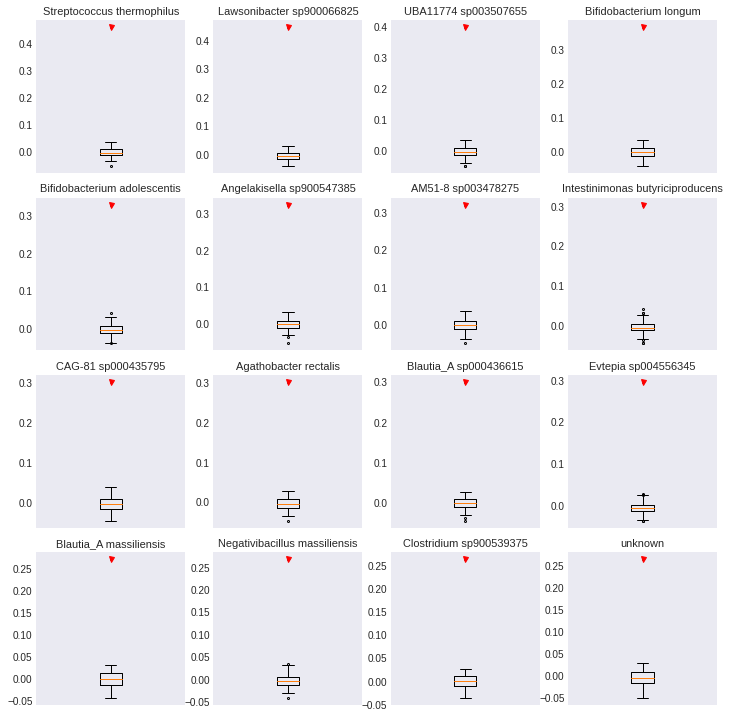

In [ ]:
series_list = []
microbe_name_list = []

for microbe_index in top_microbes.index:
    mic_perm_scores = microbes_perm_scores.loc[microbe_index]
    true_score = lgbm_diet_scores.loc[microbe_index]
    mic_scores = pd.concat([mic_perm_scores, pd.Series([true_score])], ignore_index=True)
    series_list.append(mic_scores)
    microbe_name_list.append(mb_names.loc[targets[microbe_index], 'species_new'])

# Plotting
plt.style.use('seaborn-dark')
fig, axs = plt.subplots(4, 4, figsize=(10, 10))

for i in range(4):
    for j in range(4):
        axs[i, j].boxplot(series_list[i * 4 + j], flierprops=dict(markersize=2))
        true_score = series_list[i * 4 + j].iloc[-1]
        axs[i, j].plot(1, true_score, 'rv', markersize=5)
        axs[i, j].set_xticks([])
        axs[i, j].set_title(microbe_name_list[i * 4 + j], fontsize=11)

plt.tight_layout()
plt.show()

plt.style.use('default')

In [ ]:
# p value cutoff for p < 0.01
microbes_perm_scores["true_scores"] = lgbm_diet_scores
microbes_perm_scores['true_is_max'] = microbes_perm_scores.apply(lambda row: row['true_scores'] >= max(row.drop('true_scores')), axis=1)
microbes_perm_scores['true_is_max'].sum()

625

In [ ]:
significant_targets = [target for target, m in zip(targets, microbes_perm_scores['true_is_max']) if m]
print(targets)
print(significant_targets)


['fBin__100|gBin__473|sBin__693', 'fBin__100|gBin__473|sBin__694', 'fBin__100|gBin__474|sBin__695', 'fBin__100|gBin__477|sBin__698', 'fBin__100|gBin__481|sBin__704', 'fBin__100|gBin__481|sBin__705', 'fBin__100|gBin__481|sBin__706', 'fBin__100|gBin__483|sBin__709', 'fBin__102|gBin__490|sBin__720', 'fBin__102|gBin__490|sBin__721', 'fBin__102|gBin__490|sBin__722', 'fBin__103|gBin__491|sBin__727', 'fBin__104|gBin__493|sBin__730', 'fBin__104|gBin__494|sBin__731', 'fBin__104|gBin__495|sBin__732', 'fBin__104|gBin__496|sBin__733', 'fBin__104|gBin__496|sBin__734', 'fBin__104|gBin__498|sBin__736', 'fBin__104|gBin__500|sBin__738', 'fBin__108|gBin__515|sBin__766', 'fBin__108|gBin__515|sBin__767', 'fBin__108|gBin__517|sBin__769', 'fBin__108|gBin__521|sBin__773', 'fBin__108|gBin__523|sBin__776', 'fBin__108|gBin__525|sBin__778', 'fBin__108|gBin__526|sBin__779', 'fBin__108|gBin__531|sBin__787', 'fBin__121|gBin__564|sBin__834', 'fBin__121|gBin__566|sBin__836', 'fBin__121|gBin__568|sBin__838', 'fBin__12

In [ ]:
significant_targets_index = [index for index, (target, m) in enumerate(zip(targets, microbes_perm_scores['true_is_max'])) if m]
print(targets)
print(significant_targets_index)


['fBin__100|gBin__473|sBin__693', 'fBin__100|gBin__473|sBin__694', 'fBin__100|gBin__474|sBin__695', 'fBin__100|gBin__477|sBin__698', 'fBin__100|gBin__481|sBin__704', 'fBin__100|gBin__481|sBin__705', 'fBin__100|gBin__481|sBin__706', 'fBin__100|gBin__483|sBin__709', 'fBin__102|gBin__490|sBin__720', 'fBin__102|gBin__490|sBin__721', 'fBin__102|gBin__490|sBin__722', 'fBin__103|gBin__491|sBin__727', 'fBin__104|gBin__493|sBin__730', 'fBin__104|gBin__494|sBin__731', 'fBin__104|gBin__495|sBin__732', 'fBin__104|gBin__496|sBin__733', 'fBin__104|gBin__496|sBin__734', 'fBin__104|gBin__498|sBin__736', 'fBin__104|gBin__500|sBin__738', 'fBin__108|gBin__515|sBin__766', 'fBin__108|gBin__515|sBin__767', 'fBin__108|gBin__517|sBin__769', 'fBin__108|gBin__521|sBin__773', 'fBin__108|gBin__523|sBin__776', 'fBin__108|gBin__525|sBin__778', 'fBin__108|gBin__526|sBin__779', 'fBin__108|gBin__531|sBin__787', 'fBin__121|gBin__564|sBin__834', 'fBin__121|gBin__566|sBin__836', 'fBin__121|gBin__568|sBin__838', 'fBin__12

In [ ]:
with open(home_path + 'data/given_presence/significant_targets.pkl', 'wb') as file:
    pickle.dump(significant_targets, file)

In [ ]:
print(f"{len(significant_targets)} out of {len(targets)} LGBM predictions ({round((len(significant_targets)/len(targets))*100, 2)}) are significant with p value < 0.01")

624 out of 725 LGBM predictions (86.07) are significant with p value < 0.01


In [ ]:
microbes_perm_scores['max'] = microbes_perm_scores.drop("true_is_max", axis=1).max(axis=1)
random_max = microbes_perm_scores[~microbes_perm_scores['true_is_max']]
print("Highest overall random score:", random_max['max'].max())

Highest overall random score: 0.05263957160332752


In [ ]:
microbes_perm_scores

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,true_scores,true_is_max,max
0,-0.010908,0.002719,-0.011726,-0.010182,0.020066,0.010827,-0.015906,0.006626,-0.002292,0.002067,...,0.001542,-0.004488,-0.021800,0.038966,-0.006325,0.008176,0.013104,0.047078,True,0.047078
1,-0.000969,0.011678,-0.008128,-0.006672,-0.018672,-0.027559,-0.013332,-0.005338,-0.009232,0.008550,...,0.028461,0.003063,-0.003833,-0.009152,0.000474,-0.040364,-0.008266,0.097243,True,0.097243
2,-0.012666,-0.024939,-0.001322,0.005695,0.023006,-0.015937,-0.002737,-0.001021,0.017275,-0.025026,...,0.010498,-0.018454,-0.003773,-0.037088,-0.001339,-0.016500,0.014533,0.029923,True,0.029923
3,-0.012413,-0.017452,-0.015781,-0.009829,0.012730,-0.031136,-0.015830,-0.009478,-0.011648,-0.026696,...,-0.021947,-0.002565,0.021683,-0.018172,-0.003427,0.016634,-0.006415,0.125306,True,0.125306
4,0.001612,-0.009687,-0.000267,0.025659,0.026015,-0.012270,-0.030123,0.010273,-0.017349,-0.035555,...,0.002026,0.006222,0.019359,-0.007337,0.001028,-0.002672,-0.021997,0.014148,False,0.030279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,0.014495,-0.007970,-0.008841,-0.002300,0.003448,-0.025181,-0.004186,-0.018801,0.013710,0.017745,...,0.013446,0.026690,0.007016,0.011871,0.005303,-0.008277,0.021692,0.025516,False,0.029732
722,-0.015202,-0.012961,-0.013241,-0.017532,0.013278,-0.002517,-0.014224,-0.010294,0.013900,0.011454,...,0.022883,0.021968,0.003090,0.007776,-0.011034,0.012071,-0.019405,0.064619,True,0.064619
723,-0.018557,-0.020389,0.001476,-0.010580,-0.025732,-0.004341,-0.002010,-0.017810,-0.025511,0.007863,...,-0.002733,-0.014048,-0.001469,-0.011793,0.027626,0.008166,-0.013239,0.047833,True,0.047833
724,0.002378,-0.029729,-0.022373,-0.010026,0.024340,0.034892,-0.012599,-0.006086,-0.021527,0.010983,...,0.013493,0.010755,-0.004322,-0.010778,-0.019248,-0.003777,0.011082,0.063186,True,0.063186


In [ ]:
# Function to count correlations greater or equal to the true correlation
def count_better_correlations(row):
    true_corr = row['true_scores']
    return sum(row[:-1] >= true_corr)

microbes_perm_scores['better_perm_count'] = microbes_perm_scores.drop(["true_is_max", "max"], axis=1).apply(count_better_correlations, axis=1)

In [ ]:
microbes_perm_scores['better_perm_count']

0       0
1       0
2       0
3       0
4      14
       ..
721     2
722     0
723     0
724     0
725     0
Name: better_perm_count, Length: 726, dtype: int64

In [ ]:
microbes_perm_scores['better_perm_count'][microbes_perm_scores['better_perm_count'] > 0]

4      14
5      14
8      78
13      4
14     67
       ..
696    37
699     1
712    11
716    23
721     2
Name: better_perm_count, Length: 101, dtype: int64

#### Analyzing non-significant microbes

In [ ]:
non_significant_microbes = [target for target, m in zip(targets, microbes_perm_scores['true_is_max']) if not m]
non_significant_microbes

['fBin__100|gBin__481|sBin__704',
 'fBin__100|gBin__481|sBin__705',
 'fBin__102|gBin__490|sBin__720',
 'fBin__104|gBin__494|sBin__731',
 'fBin__104|gBin__495|sBin__732',
 'fBin__104|gBin__496|sBin__733',
 'fBin__104|gBin__496|sBin__734',
 'fBin__104|gBin__500|sBin__738',
 'fBin__108|gBin__515|sBin__766',
 'fBin__14|gBin__34|sBin__42',
 'fBin__17|gBin__39|sBin__51',
 'fBin__207|gBin__800|sBin__1211',
 'fBin__219|gBin__826|sBin__1255',
 'fBin__247|gBin__900|sBin__1378',
 'fBin__247|gBin__900|sBin__1379',
 'fBin__249|gBin__916|sBin__1402',
 'fBin__257|gBin__952|sBin__1448',
 'fBin__257|gBin__956|sBin__1453',
 'fBin__257|gBin__958|sBin__1460',
 'fBin__257|gBin__961|sBin__1466',
 'fBin__257|gBin__981|sBin__1498',
 'fBin__257|gBin__994|sBin__1518',
 'fBin__262|gBin__1036|sBin__1574',
 'fBin__262|gBin__1050|sBin__1591',
 'fBin__263|gBin__1084|sBin__1639',
 'fBin__283|gBin__1167|sBin__1736',
 'fBin__320|gBin__1288|sBin__1921',
 'fBin__320|gBin__1288|sBin__1922',
 'fBin__320|gBin__1288|sBin__19

In [ ]:
# mb_names.loc[non_significant_microbes].to_csv("non_significant_microbes.csv", index=False)

In [ ]:
mb_names.loc[non_significant_microbes]

,Unnamed: 0,kingdom,phylum,class,order,family,genus,species,sBin,gBin,fBin,dist_SGB,sSGB,gSGB,fSGB
fBin__100|gBin__481|sBin__704,Rep_704,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Burkholderiaceae,Sutterella,unknown,704.0,481.0,100,0.011330,9296,6577,2400
fBin__100|gBin__481|sBin__705,Rep_705,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Burkholderiaceae,Sutterella,unknown,705.0,481.0,100,0.019596,9297,6577,2400
fBin__102|gBin__490|sBin__720,Rep_720,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Verrucomicrobiales,Akkermansiaceae,Akkermansia,Akkermansia muciniphila_A,720.0,490.0,102,0.011023,9225,6531,2382
fBin__104|gBin__494|sBin__731,Rep_731,Bacteria,Verrucomicrobiota,Lentisphaeria,Victivallales,Victivallaceae,Victivallis,Victivallis vadensis,731.0,494.0,104,0.017855,9202,6515,2377
fBin__104|gBin__495|sBin__732,Rep_732,Bacteria,Verrucomicrobiota,Lentisphaeria,Victivallales,Victivallaceae,Victivallis,unknown,732.0,495.0,104,0.012480,9199,6513,2377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fBin__76|gBin__381|sBin__552,Rep_552,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Tannerellaceae,Parabacteroides,Parabacteroides distasonis,552.0,381.0,76,0.021304,1934,1409,599
fBin__76|gBin__386|sBin__565,Rep_565,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Tannerellaceae,Parabacteroides,Parabacteroides merdae,565.0,386.0,76,0.018246,1949,1415,599
fBin__86|gBin__422|sBin__616,Rep_616,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Rikenellaceae,Alistipes,Alistipes senegalensis,616.0,422.0,86,0.023230,2296,1675,673
fBin__86|gBin__429|sBin__631,Rep_631,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Rikenellaceae,Alistipes,Alistipes sp006542685,631.0,429.0,86,0.015924,2311,1679,673


In [ ]:
mb_names['phylum'].value_counts()

Firmicutes_A         486
Bacteroidota          86
Firmicutes            52
Proteobacteria        28
Actinobacteriota      25
Firmicutes_C          17
Verrucomicrobiota     14
Desulfobacterota       9
Cyanobacteria          5
Firmicutes_B           2
Methanobacteriota      1
Name: phylum, dtype: int64

## Plots

#### Overall results for Eran

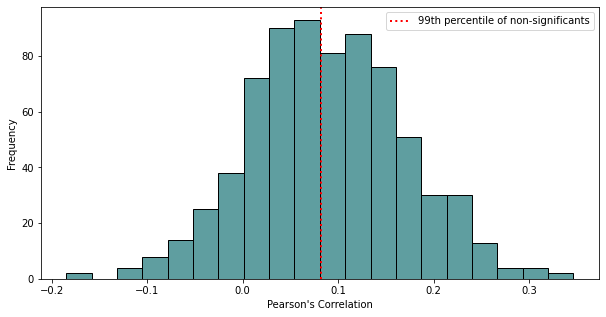

In [40]:
plt.figure(figsize=(10, 5))
plt.hist(lgbm_diet_scores, bins=20, edgecolor='black', color='cadetblue')
plt.xlabel("Pearson's Correlation", fontsize=10)
plt.ylabel("Frequency")
# plt.axvline(percentile_99, color='red', linestyle='dotted', linewidth=2, label="99th percentile of permutations")
plt.axvline(percentile_99, color='red', linestyle='dotted', linewidth=2, label="99th percentile of non-significants")
# plt.title('Distribution of Correlation Values Across All Species', fontsize=12)
plt.legend()
# plt.savefig(home_path + "figures/abundance_corr_distribution.pdf", dpi=300, facecolor="white", transparent=False, bbox_inches='tight')
plt.show()

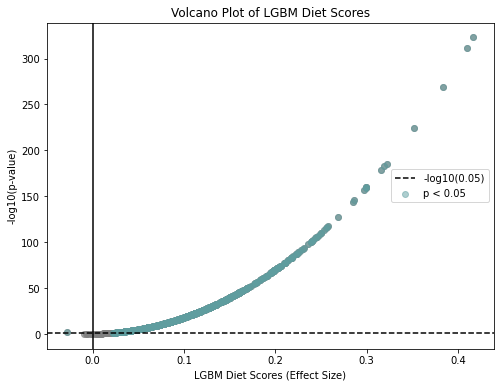

In [ ]:
neg_log_pvalues = -np.log10(lgbm_diet_pvalues)

# Creating the volcano plot
plt.figure(figsize=(8, 6))
plt.scatter(lgbm_diet_scores, neg_log_pvalues, c='gray', alpha=0.7)

# Highlight significant points
sig_threshold = 0.05
highly_significant = lgbm_diet_pvalues < sig_threshold
plt.scatter(
    lgbm_diet_scores[highly_significant], 
    neg_log_pvalues[highly_significant], 
    color='cadetblue', 
    alpha=0.5,
    label=f'p < {sig_threshold}'
)

# Adding labels and reference lines
plt.axhline(-np.log10(sig_threshold), color='black', linestyle='--', label=f'-log10({sig_threshold})')
plt.axvline(0, color='black', linestyle='-')
plt.xlabel("LGBM Diet Scores (Effect Size)")
plt.ylabel("-log10(p-value)")
plt.title("Volcano Plot of LGBM Diet Scores")
plt.legend()
plt.show()

0      [-2.9016915077816416, -2.7669458521696413, -2....
1      [-2.8684240491058173, -2.6989250624923415, -2....
2      [-2.3235155225340005, -2.2027514681552405, -2....
3      [-2.508389828034768, -2.568092716126065, -2.59...
4      [-3.431282727189102, -3.4439897565188566, -3.3...
                             ...                        
720    [-2.3601741616788585, -2.333759114650744, -2.3...
721    [-2.653288447698138, -2.883917715774515, -2.75...
722    [-2.9111607766033805, -2.9360441915878397, -2....
723    [-3.1120519946620404, -3.156591996863259, -3.1...
724    [-2.795787744912574, -2.7692451538416933, -2.8...
Name: 3, Length: 725, dtype: object
[-2.8069485776130816, -3.1195244297918423, -3.1769126373999197, -3.111034289432842, -3.087941187171291, -3.128959483388859, -2.973863204826734, -3.1179763177547355, -3.143089352218658, -3.2022793862859014, -3.0097437321729754, -3.2411429572495583, -3.14148310792712, -3.014841854640143, -3.102851847239583, -3.0733214415848393, -3.134052

IndexError: list index out of range

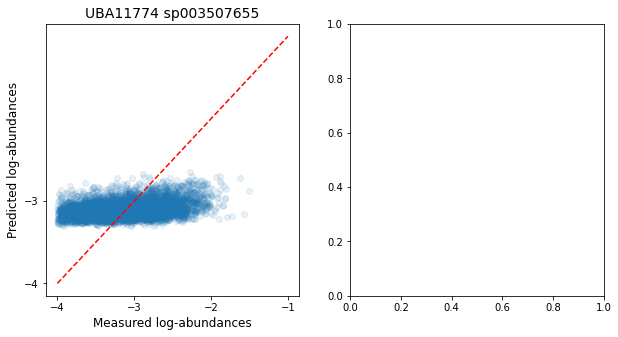

In [35]:
series_list = []
microbe_name_list = []
mic_index_list = []

for microbe_index in top_microbes.index:
    mic_index_list.append(microbe_index)
    mic_perm_scores = permutation_scores.loc[microbe_index]
    true_score = lgbm_diet_scores.loc[microbe_index]
    mic_scores = pd.concat([mic_perm_scores, pd.Series([true_score])], ignore_index=True)
    series_list.append(mic_scores)
    microbe_name_list.append(mb_names.loc[targets[microbe_index], 'species_new'])

# Plotting
# plt.style.use('seaborn-dark')
print(lgbm_diet_preds)
print(lgbm_diet_preds[mic_index_list[0]])
print(len(lgbm_diet_preds[mic_index_list[0]]))
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].scatter(x=lgbm_diet_targets[mic_index_list[0]], y=lgbm_diet_preds[mic_index_list[0]], alpha=0.1)
axs[0].plot([-4, -1], [-4, -1], 'r--')
axs[0].set_xticks(range(-4, 0))
axs[0].set_yticks(range(-4, -2))
axs[0].set_xlabel("Measured log-abundances", fontsize=12)
axs[0].set_ylabel("Predicted log-abundances", fontsize=12)
axs[0].set_title(microbe_name_list[0], fontsize=14)
axs[0].text(0.5, 0.9, f"Pearson's correlation: {series_list[0].iloc[-1]:.2f}", transform=axs[0].transAxes, 
                ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
slope, intercept, r_value, p_value, std_err = stats.linregress(lgbm_diet_targets[mic_index_list[0]], lgbm_diet_preds[mic_index_list[0]])
x = np.array([min(lgbm_diet_targets[mic_index_list[0]]), max(lgbm_diet_targets[mic_index_list[0]])])
y = slope * x + intercept
axs[0].plot(x, y, color='red', label='Trendline')

axs[1].scatter(x=lgbm_diet_targets[mic_index_list[1]], y=lgbm_diet_preds[mic_index_list[1]], alpha=0.1)
axs[1].plot([-4, -1], [-4, -1], 'r--')
axs[1].set_xticks(range(-4, 0))
axs[1].set_yticks(range(-4, 0))
axs[1].set_xlabel("Measured log-abundances", fontsize=12)
axs[1].set_ylabel("Predicted log-abundances", fontsize=12)
axs[1].set_title(microbe_name_list[1], fontsize=14)
axs[1].text(0.5, 0.9, f"Pearson's correlation: {series_list[1].iloc[-1]:.2f}", transform=axs[1].transAxes, 
                ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
slope, intercept, r_value, p_value, std_err = stats.linregress(lgbm_diet_targets[mic_index_list[1]], lgbm_diet_preds[mic_index_list[1]])
x = np.array([min(lgbm_diet_targets[mic_index_list[1]]), max(lgbm_diet_targets[mic_index_list[1]])])
y = slope * x + intercept
axs[1].plot(x, y, color='red', label='Trendline')

plt.tight_layout()
plt.show()

# plt.style.use('default')

In [36]:
pd.Series(lgbm_diet_preds[mic_index_list[0]]).sort_values()

5098   -3.308307
1374   -3.302069
3090   -3.299738
4810   -3.298385
964    -3.293049
          ...   
3494   -2.704548
2437   -2.701467
2711   -2.697940
875    -2.676145
1344   -2.647281
Length: 5626, dtype: float64

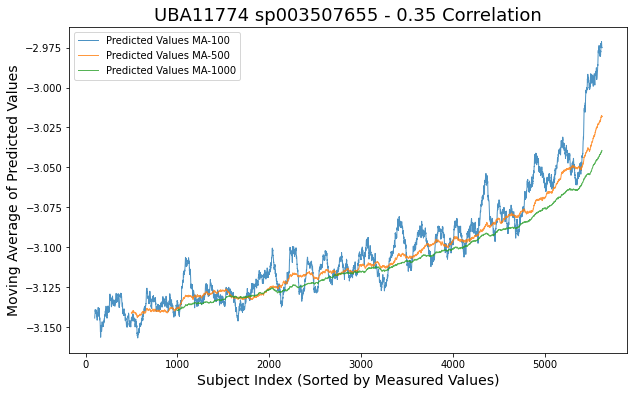

In [37]:

def moving_average(targets, preds, name):
    # Sorting by measured values to determine the order
    order_based_on_measured = np.argsort(targets)

    # Sorting predicted values based on the order determined by measured values
    sorted_predicted_values = pd.Series(preds)[order_based_on_measured]
    # Window sizes
    window_sizes = [100, 500, 1000]

    # Plotting moving averages for sorted predicted values
    plt.figure(figsize=(10, 6))
    for window_size in window_sizes:
        moving_avg = pd.Series(sorted_predicted_values).rolling(window=window_size).mean()
        plt.plot(moving_avg.reset_index(drop=True), label=f'Predicted Values MA-{window_size}', linewidth=1, alpha=0.8)

    # plt.title(f'Moving Window Average of Predicted Values - {name}')
    plt.title(f'{name}', fontsize=18)
    plt.xlabel('Subject Index (Sorted by Measured Values)', fontsize=14)
    plt.ylabel('Moving Average of Predicted Values', fontsize=14)
    plt.legend()
    plt.savefig(home_path + f"figures/moving_average_{name}.pdf", dpi=300, facecolor="white", transparent=False, bbox_inches='tight')
    plt.show()

moving_average(lgbm_diet_targets[mic_index_list[0]], lgbm_diet_preds[mic_index_list[0]], microbe_name_list[0] + f" - {round(lgbm_diet_scores[mic_index_list[0]], 2)} Correlation")

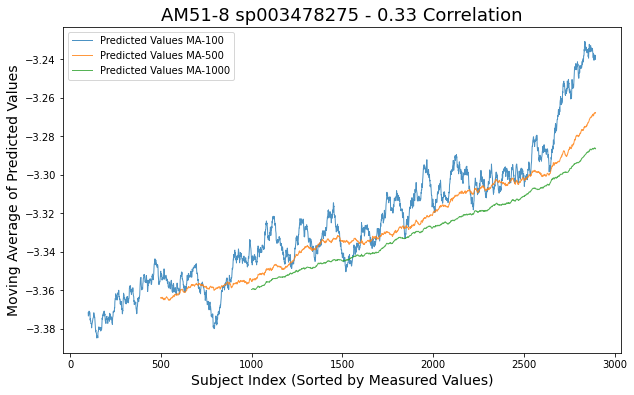

In [38]:
moving_average(lgbm_diet_targets[mic_index_list[1]], lgbm_diet_preds[mic_index_list[1]], microbe_name_list[1] + f" - {round(lgbm_diet_scores[mic_index_list[1]], 2)} Correlation")

In [39]:
lgbm_diet_scores.min()

-0.18475262368649156

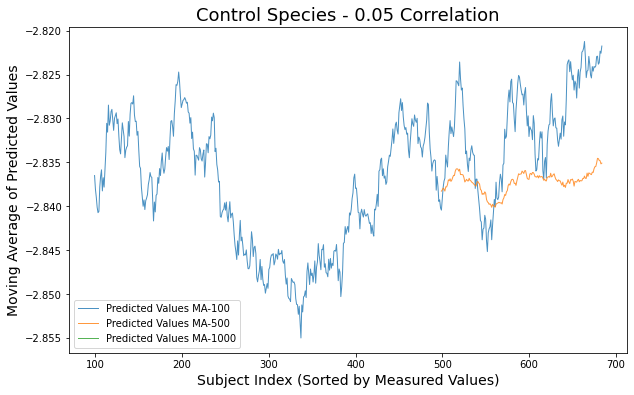

In [40]:
moving_average(lgbm_diet_targets[0], lgbm_diet_preds[0], f"Control Species - {round(lgbm_diet_scores[0], 2)} Correlation")

In [48]:
lgbm_div_targets

0    [188, 330, 219, 250, 221, 155, 246, 137, 161, ...
1    [3.72, 4.03, 4.02, 3.54, 3.48, 2.25, 3.48, 3.1...
Name: 4, dtype: object

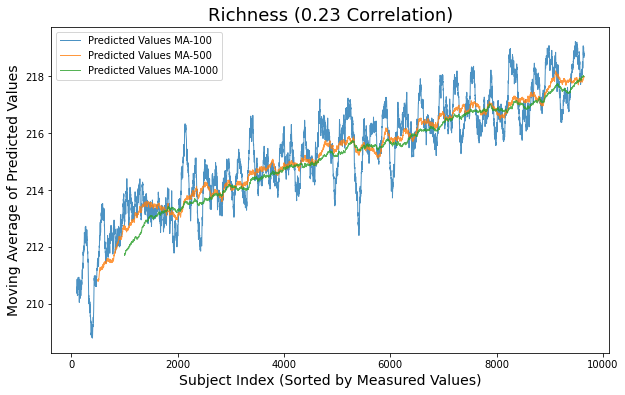

In [49]:
moving_average(lgbm_div_targets[0], lgbm_div_preds[0], f"Richness ({round(lgbm_div_scores[0], 2)} Correlation)")

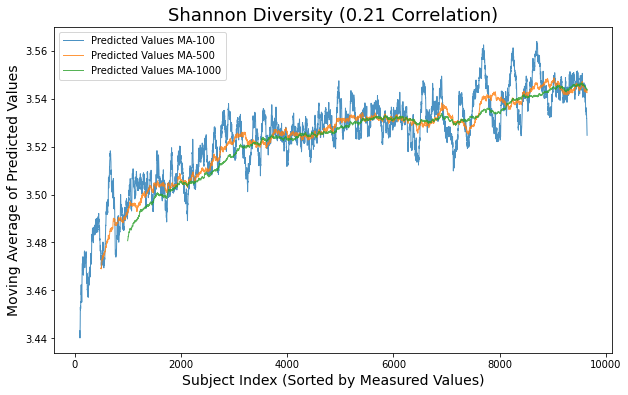

In [50]:
moving_average(lgbm_div_targets[1], lgbm_div_preds[1], f"Shannon Diversity ({round(lgbm_div_scores[1], 2)} Correlation)")

In [ ]:
# series_list = []
# microbe_name_list = []
# mic_index_list = []

# for microbe_index in top_microbes.head(2).index:
#     mic_index_list.append(microbe_index)
#     mic_perm_scores = permutation_scores.loc[microbe_index]
#     true_score = lgbm_diet_scores.loc[microbe_index]
#     mic_scores = pd.concat([mic_perm_scores, pd.Series([true_score])], ignore_index=True)
#     series_list.append(mic_scores)
#     microbe_name_list.append(mb_names.loc[targets[microbe_index], 'species_new'])

# print(mic_index_list)
# # Plotting
# # plt.style.use('seaborn-dark')
# # fig, axs = plt.subplots(2, 2, figsize=(10, 10), gridspec_kw={'height_ratios': [1, 1]})
# # fig.delaxes(axs[0][1])

# fig = plt.figure(figsize=(12, 10))
# grid = plt.GridSpec(2, 2, hspace=0.4, wspace=0.3, height_ratios=[1, 1])

# # Histogram on the top spanning two columns
# ax_hist = fig.add_subplot(grid[0, :])
# ax_hist = fig.add_subplot(2, 2, (1, 2))
# ax_hist.hist(lgbm_diet_scores, bins=20, edgecolor='black')
# ax_hist.set_xlabel("Pearson's Correlation")
# ax_hist.set_ylabel("Frequency")
# ax_hist.axvline(percentile_99, color='red', linestyle='dotted', linewidth=2, label="99th percentile of permutations")
# ax_hist.set_title('Distribution of Correlation Values Across All Species')
# ax_hist.set_yticks([])
# ax_hist.set_yticks([])
# ax_hist.legend()
# ax_hist.yaxis.get_major_locator().set_params(nbins=6)

# ax_dot1 = fig.add_subplot(grid[1, 0])
# ax_dot1.scatter(x=lgbm_diet_targets[mic_index_list[0]], y=lgbm_diet_preds[mic_index_list[0]])
# ax_dot1.plot([-4, -1], [-4, -1], 'r--')
# ax_dot1.set_xticks(range(-4, 0))
# ax_dot1.set_yticks(range(-4, 0))
# ax_dot1.set_xlabel("Measured log-abundances")
# ax_dot1.set_ylabel("Predicted log-abundances")
# ax_dot1.set_title(microbe_name_list[0], fontsize=11)

# ax_dot2 = fig.add_subplot(grid[1, 1])
# ax_dot2.scatter(x=lgbm_diet_targets[mic_index_list[1]], y=lgbm_diet_preds[mic_index_list[1]])
# ax_dot2.plot([-4, -1], [-4, -1], 'r--')
# ax_dot2.set_xticks(range(-4, 0))
# ax_dot2.set_yticks(range(-4, 0))
# ax_dot2.set_xlabel("Measured log-abundances")
# ax_dot2.set_ylabel("Predicted log-abundances")
# ax_dot2.set_title(microbe_name_list[1], fontsize=11)

# plt.tight_layout()
# plt.show()

# # plt.style.use('default')

#### How do Ridge and LGBM scores compare?

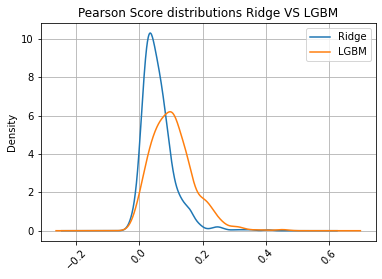

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline

to_boxplot = pd.concat([ridge_diet_scores, lgbm_diet_scores] , axis=1)
to_boxplot.columns = ["Ridge", "LGBM"]
# to_boxplot.boxplot(flierprops=dict(markersize=2))
to_boxplot.plot.kde()
plt.title("Pearson Score distributions Ridge VS LGBM")
# plt.ylabel("Pearson Corr")
plt.xticks(rotation=45)
plt.grid()
plt.savefig(home_path + "figures/ridge_vs_lgbm_dist.pdf", dpi=300, facecolor="white", transparent=False, bbox_inches='tight')
plt.show()
plt.clf()

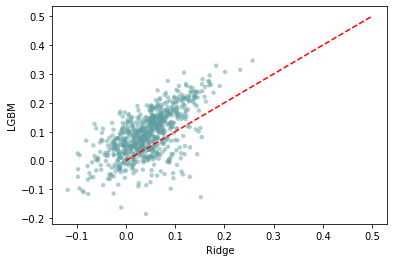

<Figure size 432x288 with 0 Axes>

In [41]:
%matplotlib inline
U, p = stats.mannwhitneyu(ridge_diet_scores, lgbm_diet_scores, alternative='two-sided')
to_plot = pd.concat([ridge_diet_scores, lgbm_diet_scores] , axis=1)
to_plot.columns = ["Ridge", "LGBM"]
to_plot.plot.scatter("Ridge", "LGBM", alpha=0.5, color='cadetblue', edgecolors='none')
# plt.title("Pearson Correlation Ridge VS LGBM")
plt.plot([0, 0.5], [0, 0.5], 'r--')
# plt.grid()
# plt.text(0.45, plt.ylim()[0] + 0.05 * (plt.ylim()[1] - plt.ylim()[0]), f'p-value: {p:.2f}', ha='center', va='center', bbox=dict(facecolor='white', edgecolor='white'))
plt.savefig(home_path + "figures/ridge_vs_lgbm_scatter.pdf", dpi=300, facecolor="white", transparent=False, bbox_inches='tight')
plt.show()
plt.clf()

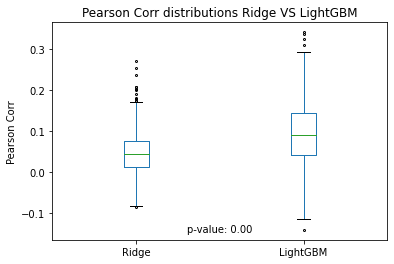

<Figure size 432x288 with 0 Axes>

In [52]:
# Ridge VS LightGBM
U, p = stats.mannwhitneyu(ridge_diet_scores, lgbm_diet_scores, alternative='two-sided')
to_boxplot = pd.concat([ridge_diet_scores, lgbm_diet_scores] , axis=1)
to_boxplot.columns = ["Ridge", "LightGBM"]
to_boxplot.boxplot(flierprops=dict(markersize=2))
plt.title("Pearson Corr distributions Ridge VS LightGBM")
plt.ylabel("Pearson Corr")
# plt.xticks(rotation=45)
plt.grid()
plt.text(1.5, plt.ylim()[0] + 0.05 * (plt.ylim()[1] - plt.ylim()[0]), f'p-value: {p:.2f}', ha='center', va='center', bbox=dict(facecolor='white', edgecolor='white'))
plt.savefig(home_path + "figures/ridge_vs_lgbm_dist_box.pdf", dpi=300, facecolor="white", transparent=False, bbox_inches='tight')
plt.show()
plt.clf()

### How do age and gender compare?

#### Diversity targets

               Age + Gender  All features
Richness           0.037309      0.231267
Shannon Index      0.109149      0.220374


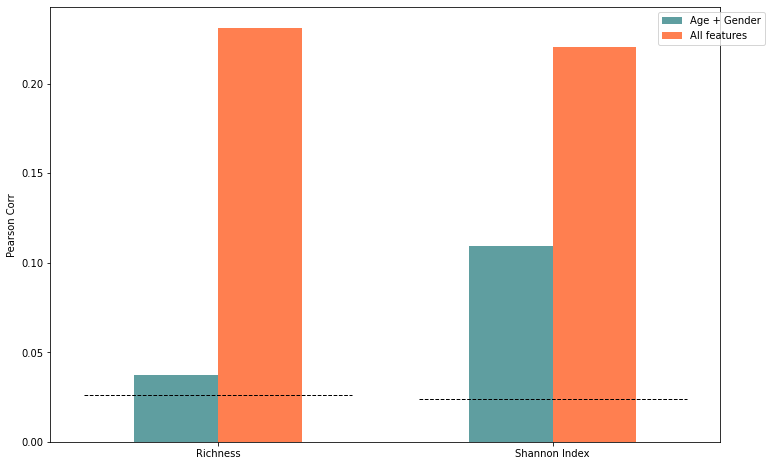

<Figure size 432x288 with 0 Axes>

In [ ]:
lgbm_div_scores = pd.Series(lgbm_div_scores)
lgbm_base_scores_div = pd.Series(lgbm_base_scores_div)

to_plot = pd.concat([lgbm_base_scores_div, lgbm_div_scores] , axis=1)
to_plot.columns = ["Age + Gender", "All features"]
to_plot.index = ["Richness", "Shannon Index"]
print(to_plot)
ax = to_plot.plot(kind="bar", legend=True, figsize=(12, 8), alpha=1, color=["cadetblue", "coral"])
# plt.title("Diversity Targets")
plt.ylabel("Pearson Corr")
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(0.9, 1.0), loc='upper left')


# Calculate bar positions
bar_positions = range(len(to_plot))  # x-positions for the bars (0 for Richness, 1 for Shannon)

# Add separate horizontal lines for each index
percentile_99_richness = np.percentile(richness_perm_scores.values.flatten(), 99)
percentile_99_shannon = np.percentile(shannon_perm_scores.values.flatten(), 99)

# Horizontal line for Richness
ax.plot(
    [bar_positions[0] - 0.4, bar_positions[0] + 0.4],  # x-range covering the Richness bar
    [percentile_99_richness, percentile_99_richness],  # y-values for the horizontal line
    color='black', linestyle='--', linewidth=1, label="99th percentile (Richness)"
)

# Horizontal line for Shannon Index
ax.plot(
    [bar_positions[1] - 0.4, bar_positions[1] + 0.4],  # x-range covering the Shannon Index bar
    [percentile_99_shannon, percentile_99_shannon],  # y-values for the horizontal line
    color='black', linestyle='--', linewidth=1, label="99th percentile (Shannon)"
)

# # Annotate the lines
# plt.text(bar_positions[0], percentile_99_richness + 0.01, f"{percentile_99_richness:.2f}", color='black', fontsize=10, ha='center')
# plt.text(bar_positions[1], percentile_99_shannon + 0.01, f"{percentile_99_shannon:.2f}", color='black', fontsize=10, ha='center')

# to_boxplot.plot.box()
plt.savefig(home_path + "figures/diversity_corr_lgbm_base_diet.pdf", dpi=300, facecolor="white", transparent=False, bbox_inches='tight')
plt.show()
plt.clf()

#### Abundance targets

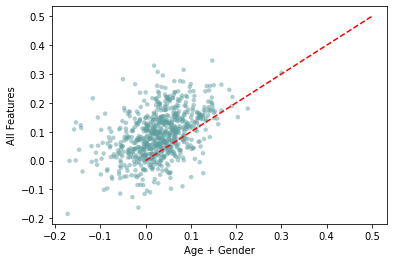

<Figure size 432x288 with 0 Axes>

In [42]:
U, p = stats.mannwhitneyu(lgbm_base_scores, lgbm_diet_scores, alternative='two-sided')
to_plot = pd.concat([lgbm_base_scores, lgbm_diet_scores] , axis=1)
to_plot.columns = ["Age + Gender", "All Features"]
to_plot.plot.scatter("Age + Gender", "All Features", c='cadetblue', edgecolors='none', alpha=0.5)
# plt.title("Abundances Targets")
plt.plot([0, 0.5], [0, 0.5], 'r--')
# plt.grid()
# plt.text(0.5, plt.ylim()[0] + 0.05 * (plt.ylim()[1] - plt.ylim()[0]), f'p-value: {p:.2f}', ha='center', va='center', bbox=dict(facecolor='white', edgecolor='white'))
plt.savefig(home_path + "figures/lgbm_base_diet_scatter.pdf", dpi=300, facecolor="white", transparent=False, bbox_inches='tight')
plt.show()
plt.clf()

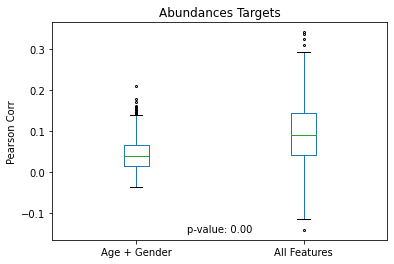

<Figure size 432x288 with 0 Axes>

In [54]:
U, p = stats.mannwhitneyu(lgbm_base_scores, lgbm_diet_scores, alternative='two-sided')
to_boxplot = pd.concat([lgbm_base_scores, lgbm_diet_scores] , axis=1)
to_boxplot.columns = ["Age + Gender", "All Features"]
to_boxplot.boxplot(flierprops=dict(markersize=2))
plt.title("Abundances Targets")
plt.ylabel("Pearson Corr")
# plt.xticks(rotation=45)
plt.grid()
plt.text(1.5, plt.ylim()[0] + 0.05 * (plt.ylim()[1] - plt.ylim()[0]), f'p-value: {p:.2f}', ha='center', va='center', bbox=dict(facecolor='white', edgecolor='white'))
plt.savefig(home_path + "figures/lgbm_base_diet_boxplots.pdf", dpi=300, facecolor="white", transparent=False, bbox_inches='tight')
plt.show()
plt.clf()

#### Comparison between previous features and new features (150 nutrients and dietary patterns)

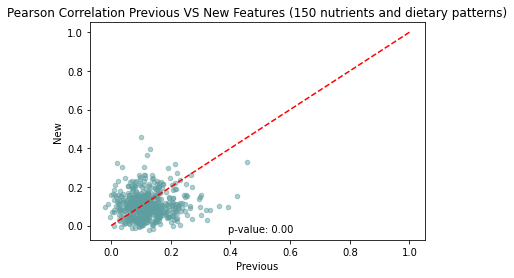

<Figure size 432x288 with 0 Axes>

In [ ]:
prev_diet_score, prev_diet_pvalues, prev_diet_coefs, prev_diet_fnames, prev_diet_preds, prev_diet_targets = read_results(pd.read_pickle(home_path + "data/given_presence/lightGBM_output_microbes_v2.pkl"))
prev_diet_score = pd.Series(prev_diet_score)

U, p = stats.mannwhitneyu(prev_diet_score, lgbm_diet_scores, alternative='two-sided')
to_plot = pd.concat([prev_diet_score, lgbm_diet_scores] , axis=1)
to_plot.columns = ["Previous", "New"]
to_plot.plot.scatter("Previous", "New", alpha=0.5, color='cadetblue')
plt.title("Pearson Correlation Previous VS New Features (150 nutrients and dietary patterns)")
plt.plot([0, 1], [0, 1], 'r--')
# plt.grid()
plt.text(0.5, plt.ylim()[0] + 0.05 * (plt.ylim()[1] - plt.ylim()[0]), f'p-value: {p:.2f}', ha='center', va='center', bbox=dict(facecolor='white', edgecolor='white'))
plt.savefig(home_path + "diet_mb/figures/prev_vs_new_features.pdf", dpi=300, facecolor="white", transparent=False, bbox_inches='tight')
plt.show()
plt.clf()

Improvement from adding variance features and macros

In [ ]:
# Improvement from adding variance features and macros
lgbm_diet_scores_no_var_features, _, _, _, _  = read_results(pd.read_pickle(home_path + "data/given_presence/output_LGBM_abundance_no_var_features.pkl"))
delta = pd.Series(lgbm_diet_scores) - pd.Series(lgbm_diet_scores_no_var_features)
delta.describe()

count    726.000000
mean      -0.000168
std        0.002380
min       -0.007520
25%       -0.001540
50%       -0.000244
75%        0.000945
max        0.022865
Name: 0, dtype: float64

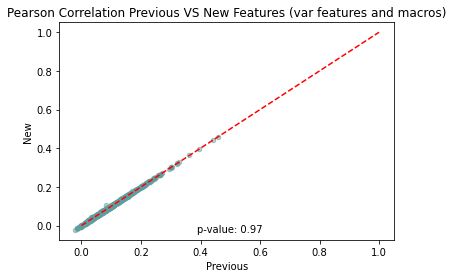

<Figure size 432x288 with 0 Axes>

In [ ]:

lgbm_diet_scores_no_var_features = pd.Series(lgbm_diet_scores_no_var_features)

U, p = stats.mannwhitneyu(lgbm_diet_scores_no_var_features, lgbm_diet_scores, alternative='two-sided')
to_plot = pd.concat([lgbm_diet_scores_no_var_features, lgbm_diet_scores] , axis=1)
to_plot.columns = ["Previous", "New"]
to_plot.plot.scatter("Previous", "New", alpha=0.5, color='cadetblue')
plt.title("Pearson Correlation Previous VS New Features (var features and macros)")
plt.plot([0, 1], [0, 1], 'r--')
# plt.grid()
plt.text(0.5, plt.ylim()[0] + 0.05 * (plt.ylim()[1] - plt.ylim()[0]), f'p-value: {p:.2f}', ha='center', va='center', bbox=dict(facecolor='white', edgecolor='white'))
# plt.savefig(home_path + "figures/", dpi=300, facecolor="white", transparent=False, bbox_inches='tight')
plt.show()
plt.clf()

In [ ]:
# Improvement from adding variance features and macros
lgbm_diet_scores_div_no_var_features, _, _, _, _  = read_results(pd.read_pickle("/net/mraid20/export/genie/LabData/Analyses/tomerse/test/output_LGBM_div_no_var_features.pkl"))
delta = pd.Series(lgbm_div_scores) - pd.Series(lgbm_diet_scores_div_no_var_features)
delta.describe()

count    2.000000
mean    -0.001949
std      0.000683
min     -0.002432
25%     -0.002191
50%     -0.001949
75%     -0.001708
max     -0.001467
Name: 0, dtype: float64

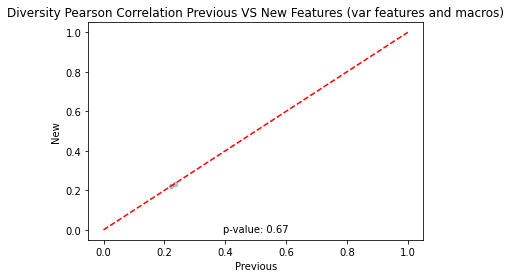

<Figure size 432x288 with 0 Axes>

In [ ]:

lgbm_diet_scores_div_no_var_features = pd.Series(lgbm_diet_scores_div_no_var_features)

U, p = stats.mannwhitneyu(lgbm_diet_scores_div_no_var_features, lgbm_div_scores, alternative='two-sided')
to_plot = pd.concat([lgbm_diet_scores_div_no_var_features, lgbm_div_scores] , axis=1)
to_plot.columns = ["Previous", "New"]
to_plot.plot.scatter("Previous", "New", alpha=0.5, color='cadetblue')
plt.title("Diversity Pearson Correlation Previous VS New Features (var features and macros)")
plt.plot([0, 1], [0, 1], 'r--')
# plt.grid()
plt.text(0.5, plt.ylim()[0] + 0.05 * (plt.ylim()[1] - plt.ylim()[0]), f'p-value: {p:.2f}', ha='center', va='center', bbox=dict(facecolor='white', edgecolor='white'))
# plt.savefig(home_path + "figures/", dpi=300, facecolor="white", transparent=False, bbox_inches='tight')
plt.show()
plt.clf()

#### What is the corr diference between the highly predicted microbes in LGBM and Ridge?
Maybe those with high signal will show a significant difference between the models.

In [ ]:
highly_pred_microbes_lgbm = lgbm_diet_scores.sort_values(ascending=False)
highly_pred_microbes_lgbm = highly_pred_microbes_lgbm[highly_pred_microbes_lgbm > 0.2]
highly_pred_microbes_lgbm

46     0.457891
596    0.443861
223    0.395274
34     0.363226
32     0.327653
         ...   
589    0.203570
269    0.202614
194    0.201755
202    0.201722
43     0.200094
Name: 0, Length: 69, dtype: float64

In [ ]:
highly_pred_microbes_ridge = ridge_diet_scores.sort_values(ascending=False)
highly_pred_microbes_ridge = highly_pred_microbes_ridge[highly_pred_microbes_ridge > 0.2]
highly_pred_microbes_ridge

46     0.406950
596    0.354104
223    0.331098
34     0.304455
32     0.271717
509    0.254289
581    0.253972
588    0.246241
221    0.242085
201    0.236998
309    0.223468
237    0.204483
Name: 0, dtype: float64

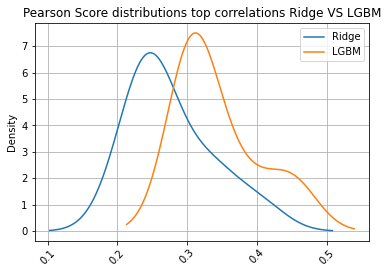

<Figure size 432x288 with 0 Axes>

In [ ]:
# Top predictions Ridge vs LGBM KDE

to_boxplot = pd.concat([highly_pred_microbes_ridge, highly_pred_microbes_lgbm] , axis=1).dropna()
to_boxplot.columns = ["Ridge", "LGBM"]
# to_boxplot.boxplot(flierprops=dict(markersize=2))
to_boxplot.plot.kde()
plt.title("Pearson Score distributions top correlations Ridge VS LGBM")
# plt.ylabel("Pearson Corr")
plt.xticks(rotation=45)
plt.grid()
plt.savefig(home_path + "figures/ridge_vs_lgbm_dist_top_corr_kde.pdf", dpi=300, facecolor="white", transparent=False, bbox_inches='tight')
plt.show()
plt.clf()

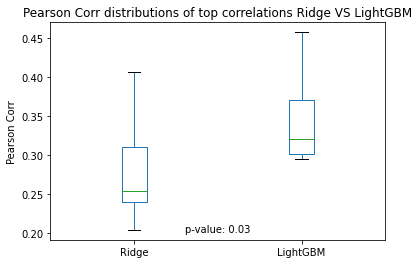

<Figure size 432x288 with 0 Axes>

In [ ]:
# Top prediction Ridge VS LightGBM boxplot
to_boxplot = pd.concat([highly_pred_microbes_ridge, highly_pred_microbes_lgbm] , axis=1).dropna()
U, p = stats.mannwhitneyu(highly_pred_microbes_ridge, highly_pred_microbes_lgbm, alternative='two-sided')
to_boxplot.columns = ["Ridge", "LightGBM"]
to_boxplot.boxplot(flierprops=dict(markersize=2))
plt.title("Pearson Corr distributions of top correlations Ridge VS LightGBM")
plt.ylabel("Pearson Corr")
# plt.xticks(rotation=45)
plt.grid()
plt.text(1.5, plt.ylim()[0] + 0.05 * (plt.ylim()[1] - plt.ylim()[0]), f'p-value: {p:.2f}', ha='center', va='center', bbox=dict(facecolor='white', edgecolor='white'))
plt.savefig(home_path + "figures/ridge_vs_lgbm_dist_top_corr_box.pdf", dpi=300, facecolor="white", transparent=False, bbox_inches='tight')
plt.show()
plt.clf()

#### Robustness Check

Abundance:

In [ ]:
def read_robustness(TARGETS):

    MODEL = 'LGBM' # 'LGBM' or 'ridge'
    STAGE = 'baseline' # 'baseline' or '02_visit'
    # suffix = '_all_baseline' if SPLIT == 'all_baseline' else '' 
    PROBLEM = '' # 'classification' or '' for regression
    robustness_results = []

    test_02_visit = pd.read_pickle(home_path + "data/diet_mb_02_visit.pkl")
        
    baseline_subjects = list(diet_mb.index)
    visit_subjects = list(test_02_visit.index)
    print("Length of baseline_subjects:", len(baseline_subjects))
    print("Length of visit_subjects:", len(visit_subjects))
    test_baseline = diet_mb.loc[diet_mb.index.isin(visit_subjects)]
    test_02_visit = test_02_visit.loc[test_02_visit.index.isin(test_baseline.index)]
    print(test_baseline.shape)  
    print(test_02_visit.shape) 
    # test_baseline is my holdout set 
    current_df = diet_mb.loc[~diet_mb.index.isin(visit_subjects)].copy()

    n_samples = len(current_df)
    samples = []

    iteration = 1
    while n_samples > 1:
        samples.append(n_samples)
        print(f"Iteration {iteration}: {n_samples} samples")
        loaded = pickle.load(open(home_path + "data/robustness/output_" + MODEL + '_' + TARGETS + '_' + str(n_samples) + '_samples' + PROBLEM + '.pkl', "rb"))
        robustness_results.append(loaded)
        # Reduce samples by half for the next iteration
        n_samples = math.ceil(n_samples / 2)  # Use math.ceil to ensure at least one sample
        current_df = current_df.sample(n=n_samples, random_state=iteration).reset_index(drop=True)
        iteration += 1

    return robustness_results, samples


def robustness_calc(robustness_results, samples, TARGETS):
    if TARGETS == "div":
        print("div")
        robustness_scores_richness = []
        robustness_scores_shannon = []
        for result in robustness_results:
            robustness_scores, robustness_pvalues, robustness_coefs, robustness_preds, robustness_targets = read_results(result)
            robustness_scores_richness.append(robustness_scores[0])
            robustness_scores_shannon.append(robustness_scores[1])

        nan_index = np.isnan(robustness_scores_richness).argmax()
        robustness_scores_richness = robustness_scores_richness[:nan_index]
        robustness_scores_shannon = robustness_scores_shannon[:nan_index]
        samples = samples[:nan_index]

        iterations = list(range(1, nan_index + 1))

        return robustness_scores_richness, robustness_scores_shannon, iterations, samples

    elif TARGETS == "abundance":
        print("abundance")
        robustness_means = []
        robustness_stds = []
        for result in robustness_results:
            robustness_scores, robustness_pvalues, robustness_coefs, robustness_preds, robustness_targets = read_results(result)
            robustness_means.append(robustness_scores.mean())
            robustness_stds.append(robustness_scores.std())


        nan_index = np.isnan(robustness_means).argmax()
        robustness_means = robustness_means[:nan_index]
        robustness_stds = robustness_stds[:nan_index]
        samples = samples[:nan_index]

        iterations = list(range(1, nan_index + 1))

        return robustness_means, robustness_stds, iterations, samples


In [ ]:
robustness_results, samples = read_robustness("abundance")
robustness_means, robustness_stds, iterations, samples = robustness_calc(robustness_results, samples, "abundance")

print(robustness_means)
print(robustness_stds)
print(iterations)
print(samples)

Length of baseline_subjects: 8449
Length of visit_subjects: 2493
(2320, 1582)
(2320, 1548)
Iteration 1: 6129 samples


FileNotFoundError: [Errno 2] No such file or directory: '/net/mraid20/export/genie/LabData/Analyses/tomerse/test/robustness/output_LGBM_abundance_6129_samples.pkl'

In [ ]:
# Abundance

def plot_robustness_abundance(robustness_means, robustness_stds, samples):
    # Plot mean with standard deviations as error bars
    plt.figure(figsize=(12, 6))
    plt.errorbar(
        samples,
        robustness_means,
        yerr=robustness_stds,
        fmt='-o',
        capsize=5,
        label="Mean Pearson Correlations",
        # ecolor='black', 
        color='cadetblue'
    )

    # Formatting
    # plt.title("Mean Pearson Correlations per Number of Subjects")
    plt.xlabel("Number of Subjects per Iteration", fontsize=14)
    plt.ylabel("Mean Pearson Correlation ± STD", fontsize=14)
    # plt.xscale("log")  # Log scale for better visibility
    plt.xticks(samples, rotation=90)
    plt.grid(alpha=0.5, linestyle='--')
    # plt.legend()

    # Show plot
    plt.tight_layout()
    plt.savefig(home_path + "figures/abundance_robustness.pdf", dpi=300, facecolor="white", transparent=False, bbox_inches='tight')
    plt.show()


plot_robustness_abundance(robustness_means, robustness_stds, samples)

NameError: name 'robustness_means' is not defined

Diversity:

In [ ]:
robustness_results, samples = read_robustness("div")
robustness_scores_richness, robustness_scores_shannon, iterations, samples = robustness_calc(robustness_results, samples, "div")

print(robustness_scores_richness)
print(robustness_scores_shannon)
print(iterations)
print(samples)

Length of baseline_subjects: 8449
Length of visit_subjects: 2493
(2320, 1582)
(2320, 1548)
Iteration 1: 6129 samples


FileNotFoundError: [Errno 2] No such file or directory: '/net/mraid20/export/genie/LabData/Analyses/tomerse/test/robustness/output_LGBM_div_6129_samples.pkl'

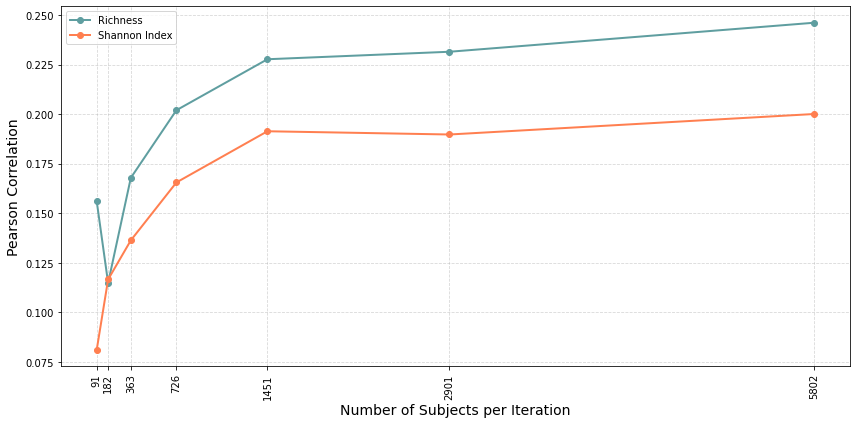

In [ ]:
# Abundance

def plot_robustness_div(robustness_scores_richness, robustness_scores_shannon, samples):
    plt.figure(figsize=(12, 6))
    
    # Plot the two lines
    plt.plot(samples, robustness_scores_richness, label="Richness", marker='o', linestyle='-', linewidth=2, color='cadetblue')
    plt.plot(samples, robustness_scores_shannon, label="Shannon Index", marker='o', linestyle='-', linewidth=2, color='coral')
    
    # Formatting
    # plt.title("Diversity Pearson's Correlations per Number of Subjects")
    plt.xlabel("Number of Subjects per Iteration", fontsize=14)
    plt.ylabel("Pearson Correlation", fontsize=14)
    plt.xticks(samples, rotation=90)
    plt.grid(alpha=0.5, linestyle='--')
    plt.legend()

    # Show plot
    plt.tight_layout()
    plt.savefig(home_path + "figures/diversity_robustness.pdf", dpi=300, facecolor="white", transparent=False, bbox_inches='tight')
    plt.show()
    

plot_robustness_div(robustness_scores_richness, robustness_scores_shannon, samples)